In [15]:
from bs4 import BeautifulSoup as soup
from datetime import date, datetime
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings('ignore')

In [16]:
#now doing web scraping
url = "https://www.worldometers.info/coronavirus/#countries"
req = Request(url,headers={'User-Agent':"Mozilla/5.0"})
webpage = urlopen(req)
print(webpage)

In [17]:
bs_page = soup(webpage,'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 177,816,856 Cases and 3,848,940 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
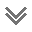

In [18]:
print(bs_page.prettify())

In [19]:
today = datetime.now()

In [20]:
yesterday = "%s %d, %d" %(date.today().strftime("%b"),today.day-1,today.year)
yesterday

'Jun 16, 2021'

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 177,816,856 Cases and 3,848,940 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
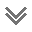

In [21]:
print(bs_page.prettify())

In [22]:
table = bs_page.find_all("table",{"id":"main_table_countries_yesterday"})
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [23]:
containers = table[0].find_all("tr",{"style":""})

In [24]:
title = containers[0]
title
del containers[0]

In [25]:
all_data=[]
clean = True
for country in containers:
    country_data=[]
    country_container=country.find_all("td")
    if country_container[1].text=='China':
        continue
    #print(country_container[1].text)
    for i in range(1,len(country_container)):
        final_feature = country_container[i].text
        #print(i)
        if clean:
            if i!=1 and i!=len(country_container)-1:
                final_feature = final_feature.replace(',','')
                if final_feature.find('+')!=-1:
                    final_feature = final_feature.replace('+','')
                    final_feature = float(final_feature)
                elif final_feature.find('-')!=-1:
                    final_feature = final_feature.replace('-','')
                    final_feature = float(final_feature)*-1
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature=='' or final_feature==' ':
            final_feature = -1
        country_data.append(final_feature)
    all_data.append(country_data)

In [26]:
all_data

[['World',
  '177797440',
  397964.0,
  '3848510',
  9462.0,
  '162287438',
  455656.0,
  '11661492',
  '83058',
  '22810',
  '493.7',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '34365985',
  14063.0,
  '616150 ',
  434.0,
  '28616495',
  37794.0,
  '5133340',
  '4288',
  '103244',
  '1851',
  '496625233',
  '1491993',
  '332860237 ',
  'North America',
  '10',
  '540',
  '1',
  '42',
  '1',
  '15,422'],
 ['India',
  '29699555',
  67294.0,
  '381931 ',
  1411.0,
  '28484544',
  103910.0,
  '833080',
  '8944',
  '21321',
  '274',
  '383306971',
  '275171',
  '1392975652 ',
  'Asia',
  '47',
  '3647',
  '4',
  '48',
  '1',
  '598'],
 ['Brazil',
  '17629714',
  85861.0,
  '493837 ',
  2673.0,
  '16030601',
  85955.0,
  '1105276',
  '8318',
  '82380',
  '2308',
  '50870041',
  '237705',
  '214005000 ',
  'South America',
  '12',
  '433',
  '4',
  '401',
  '12',
  '5,165'],
 ['France',
  '5747647',
  3058.0,
  '110578 ',
  44.0,
  '5525095',
  13853.0,
  '1

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.DataFrame(all_data)
df

0          1         2        3       4          5   \
0                    World  177797440  397964.0  3848510  9462.0  162287438   
1                      USA   34365985   14063.0  616150    434.0   28616495   
2                    India   29699555   67294.0  381931   1411.0   28484544   
3                   Brazil   17629714   85861.0  493837   2673.0   16030601   
4                   France    5747647    3058.0  110578     44.0    5525095   
..                     ...        ...       ...      ...     ...        ...   
203                  Macao         52      -1.0       -1    -1.0         51   
204              Greenland         49      -1.0       -1    -1.0         40   
205  Saint Pierre Miquelon         26      -1.0       -1    -1.0         25   
206         Western Sahara         10      -1.0       1     -1.0          8   
207                 Total:  177797440  397964.0  3848510  9462.0  162287438   

           6         7      8        9   ...         11       12           13  \
0    455656.0  11661492  83058    22810  ...         -1       -1           -1   
1     37794.0   5133340   4288   103244  ...  496625233  1491993   332860237    
2    103910.0    833080   8944    21321  ...  383306971   275171  1392975652    
3     85955.0   1105276   8318    82380  ...   50870041   237705   214005000    
4     13853.0    111974   1873    87869  ...   89589999  1369629    65411863    
..        ...       ...    ...      ...  ...        ...      ...          ...   
203      -1.0         1     -1       79  ...       4483     6815      657789    
204      -1.0         9     -1      862  ...      27387   481623       56864    
205      -1.0         1     -1     4508  ...       6128  1062598        5767    
206      -1.0         1     -1       16  ...         -1       -1      611319    
207  455656.0  11661492  83058  22809.8  ...         -1       -1           -1   

                14     15      16   17   18   19      20  
0              All     \n      -1   -1   -1   -1      -1  
1    North America     10     540    1   42    1  15,422  
2             Asia     47    3647    4   48    1     598  
3    South America     12     433    4  401   12   5,165  
4           Europe     11     592    1   47  0.7   1,712  
..             ...    ...     ...  ...  ...  ...     ...  
203           Asia  12650      -1  147   -1   -1       2  
204  North America   1160      -1    2   -1   -1     158  
205  North America    222      -1    1   -1   -1     173  
206         Africa  61132  611319   -1   -1   -1       2  
207            All     \n      -1   -1   -1   -1      -1  

[208 rows x 21 columns]

In [29]:
column_labels = ['Country','Total Cases','New Cases','Total Deaths','New Deaths','Total Recovered','New Recovered','Active Cases','Serious/Critical','Total Cases/1M','Deaths/1M','Total Tests','Tests/1M','Population','Continent']

In [30]:
len(column_labels)


15

In [31]:
df

0          1         2        3       4          5   \
0                    World  177797440  397964.0  3848510  9462.0  162287438   
1                      USA   34365985   14063.0  616150    434.0   28616495   
2                    India   29699555   67294.0  381931   1411.0   28484544   
3                   Brazil   17629714   85861.0  493837   2673.0   16030601   
4                   France    5747647    3058.0  110578     44.0    5525095   
..                     ...        ...       ...      ...     ...        ...   
203                  Macao         52      -1.0       -1    -1.0         51   
204              Greenland         49      -1.0       -1    -1.0         40   
205  Saint Pierre Miquelon         26      -1.0       -1    -1.0         25   
206         Western Sahara         10      -1.0       1     -1.0          8   
207                 Total:  177797440  397964.0  3848510  9462.0  162287438   

           6         7      8        9   ...         11       12           13  \
0    455656.0  11661492  83058    22810  ...         -1       -1           -1   
1     37794.0   5133340   4288   103244  ...  496625233  1491993   332860237    
2    103910.0    833080   8944    21321  ...  383306971   275171  1392975652    
3     85955.0   1105276   8318    82380  ...   50870041   237705   214005000    
4     13853.0    111974   1873    87869  ...   89589999  1369629    65411863    
..        ...       ...    ...      ...  ...        ...      ...          ...   
203      -1.0         1     -1       79  ...       4483     6815      657789    
204      -1.0         9     -1      862  ...      27387   481623       56864    
205      -1.0         1     -1     4508  ...       6128  1062598        5767    
206      -1.0         1     -1       16  ...         -1       -1      611319    
207  455656.0  11661492  83058  22809.8  ...         -1       -1           -1   

                14     15      16   17   18   19      20  
0              All     \n      -1   -1   -1   -1      -1  
1    North America     10     540    1   42    1  15,422  
2             Asia     47    3647    4   48    1     598  
3    South America     12     433    4  401   12   5,165  
4           Europe     11     592    1   47  0.7   1,712  
..             ...    ...     ...  ...  ...  ...     ...  
203           Asia  12650      -1  147   -1   -1       2  
204  North America   1160      -1    2   -1   -1     158  
205  North America    222      -1    1   -1   -1     173  
206         Africa  61132  611319   -1   -1   -1       2  
207            All     \n      -1   -1   -1   -1      -1  

[208 rows x 21 columns]

In [33]:
df.drop([15,16,17,18,19,20],inplace=True,axis=1)
df.columns = column_labels
df.head()

Country Total Cases  New Cases Total Deaths  New Deaths Total Recovered  \
0   World   177797440   397964.0      3848510      9462.0       162287438   
1     USA    34365985    14063.0      616150        434.0        28616495   
2   India    29699555    67294.0      381931       1411.0        28484544   
3  Brazil    17629714    85861.0      493837       2673.0        16030601   
4  France     5747647     3058.0      110578         44.0         5525095   

   New Recovered Active Cases Serious/Critical Total Cases/1M Deaths/1M  \
0       455656.0     11661492            83058          22810     493.7   
1        37794.0      5133340             4288         103244      1851   
2       103910.0       833080             8944          21321       274   
3        85955.0      1105276             8318          82380      2308   
4        13853.0       111974             1873          87869      1690   

  Total Tests Tests/1M   Population      Continent  
0          -1       -1           -1            All  
1   496625233  1491993   332860237   North America  
2   383306971   275171  1392975652            Asia  
3    50870041   237705   214005000   South America  
4    89589999  1369629    65411863          Europe

In [34]:
for label in df:
    if label=='Country' or label=='Continent':
        continue
    else:
        df[label] = pd.to_numeric(df[label])

In [35]:
df['%Inc Cases'] = df['New Cases']/df['Total Cases']*100
df['%Inc Deaths'] = df['New Deaths']/df['Total Deaths']*100
df['%Inc Recovered'] = df['New Recovered']/df['Total Recovered']*100

In [36]:
df.head()

Country  Total Cases  New Cases  Total Deaths  New Deaths  Total Recovered  \
0   World    177797440   397964.0       3848510      9462.0        162287438   
1     USA     34365985    14063.0        616150       434.0         28616495   
2   India     29699555    67294.0        381931      1411.0         28484544   
3  Brazil     17629714    85861.0        493837      2673.0         16030601   
4  France      5747647     3058.0        110578        44.0          5525095   

   New Recovered  Active Cases  Serious/Critical  Total Cases/1M  Deaths/1M  \
0       455656.0      11661492             83058         22810.0      493.7   
1        37794.0       5133340              4288        103244.0     1851.0   
2       103910.0        833080              8944         21321.0      274.0   
3        85955.0       1105276              8318         82380.0     2308.0   
4        13853.0        111974              1873         87869.0     1690.0   

   Total Tests  Tests/1M  Population      Continent  %Inc Cases  %Inc Deaths  \
0           -1        -1          -1            All    0.223830     0.245861   
1    496625233   1491993   332860237  North America    0.040921     0.070437   
2    383306971    275171  1392975652           Asia    0.226583     0.369438   
3     50870041    237705   214005000  South America    0.487024     0.541272   
4     89589999   1369629    65411863         Europe    0.053204     0.039791   

   %Inc Recovered  
0        0.280771  
1        0.132071  
2        0.364794  
3        0.536193  
4        0.250729

In [37]:
#now doing Exploratory data analysis

In [38]:
cases = df.loc[0,['Total Recovered','Active Cases','Total Deaths']]

In [39]:
cases_df = pd.DataFrame(cases).reset_index()

In [40]:
cases_df.columns=['Type','Total']

In [41]:
cases_df['Percentage'] = 100*cases_df['Total']/np.sum(cases_df['Total'])

In [42]:
cases_df['virus'] = ["COVID-19" for i in range(len(cases_df))]

In [43]:
cases_df

Type      Total Percentage     virus
0  Total Recovered  162287438    91.2766  COVID-19
1     Active Cases   11661492    6.55886  COVID-19
2     Total Deaths    3848510    2.16455  COVID-19

In [47]:
fig = px.bar(cases_df,x='virus',y='Percentage',color='Type',hover_data=['Total'])
fig.show()

In [48]:
cases = df.loc[0,['New Cases','New Recovered','New Deaths']]
cases_df = pd.DataFrame(cases).reset_index()
cases_df.columns=['Type','Total']
cases_df['Percentage'] = 100*cases_df['Total']/np.sum(cases_df['Total'])
cases_df['virus'] = ["COVID-19" for i in range(len(cases_df))]
fig = px.bar(cases_df,x='virus',y='Percentage',color='Type',hover_data=['Total'])
fig.show()

<AxesSubplot:>

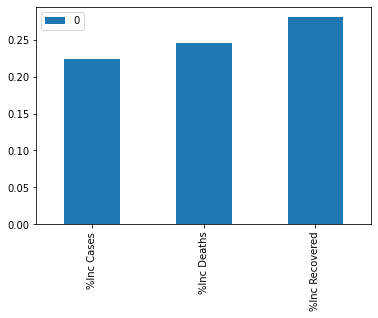

In [56]:
per = df.loc[0,['%Inc Cases','%Inc Deaths','%Inc Recovered']]
per_df = pd.DataFrame(per)
#per_df.columns=['Percentage']
#fig = go.Figure()
per_df.plot.bar()

In [60]:
#now explore data related to continent
continent_df = df.groupby('Continent').sum().drop('All')
continent_df.reset_index(inplace=True)
continent_df

Continent  Total Cases  New Cases  Total Deaths  New Deaths  \
0             Africa      5150240    24072.0        136254       346.0   
1               Asia     53836380   141160.0        751426      2620.0   
2  Australia/Oceania        70316      145.0          1247        -6.0   
3             Europe     47301593    40669.0       1089148       984.0   
4      North America     40250068    28423.0        909497       806.0   
5      South America     31082463   163435.0        956181      4621.0   

   Total Recovered  New Recovered  Active Cases  Serious/Critical  \
0          4583120        10338.0        430866              2882   
1         51076814       179281.0       2008139             26871   
2            67208           32.0          1860                 7   
3         44737986        58359.0       1474459              9512   
4         33538367        50379.0       5802200             11682   
5         26462136       157196.0       1838478             32030   

   Total Cases/1M  Deaths/1M  Total Tests  Tests/1M  Population  %Inc Cases  \
0        583216.0     8219.0     50677911   4865794  1371142305    8.711343   
1       1453911.0    14185.0    774906551  34411454  3192889992   22.030655   
2         72699.0      566.0     21970921   1586425    41366586    7.760984   
3       3534383.0    68948.0    921008175  80831369   748062264    2.513314   
4       1245903.0    17418.0    556231898  26663028   593389303    7.758663   
5        751168.0    20750.0    125565995   4692728   434154180    8.458539   

   %Inc Deaths  %Inc Recovered  
0  -126.266835       -4.066922  
1   -50.866849       19.948346  
2    74.733670        3.946604  
3  -112.535034        5.883354  
4   113.825857       -2.187463  
5     7.371902        9.589032

In [73]:
def continent_plot(lst):
    for label in lst:
        c_df = continent_df[['Continent',label]]
        c_df['Percentage'] = 100*c_df[label]/np.sum(c_df[label])
        c_df['virus'] = ["COVID-19" for i in range(len(c_df))]
        #c_df.plot.bar()
        fig1 = px.bar(c_df,x='virus',y='Percentage',color='Continent',hover_data=[label])
        fig1.update_layout(title={"text":f'{label}'})
        fig1.show()

In [74]:
cases_list = ['Total Cases','New Cases','Active Cases','Serious/Critical','Total Cases/1M']
deaths_list = ['Total Deaths','New Deaths','Deaths/1M']
recovered_list = ['Total Recovered','New Recovered','%Inc Recovered']

In [75]:
continent_plot(cases_list)

In [76]:
#now country analysis
country_df = df.drop([len(df)-1])
country_df = df.drop([0])
country_df

Country  Total Cases  New Cases  Total Deaths  New Deaths  \
1                      USA     34365985    14063.0        616150       434.0   
2                    India     29699555    67294.0        381931      1411.0   
3                   Brazil     17629714    85861.0        493837      2673.0   
4                   France      5747647     3058.0        110578        44.0   
5                   Turkey      5348249     6221.0         48950        71.0   
..                     ...          ...        ...           ...         ...   
203                  Macao           52       -1.0            -1        -1.0   
204              Greenland           49       -1.0            -1        -1.0   
205  Saint Pierre Miquelon           26       -1.0            -1        -1.0   
206         Western Sahara           10       -1.0             1        -1.0   
207                 Total:    177797440   397964.0       3848510      9462.0   

     Total Recovered  New Recovered  Active Cases  Serious/Critical  \
1           28616495        37794.0       5133340              4288   
2           28484544       103910.0        833080              8944   
3           16030601        85955.0       1105276              8318   
4            5525095        13853.0        111974              1873   
5            5215654         4632.0         83645               881   
..               ...            ...           ...               ...   
203               51           -1.0             1                -1   
204               40           -1.0             9                -1   
205               25           -1.0             1                -1   
206                8           -1.0             1                -1   
207        162287438       455656.0      11661492             83058   

     Total Cases/1M  Deaths/1M  Total Tests  Tests/1M  Population  \
1          103244.0     1851.0    496625233   1491993   332860237   
2           21321.0      274.0    383306971    275171  1392975652   
3           82380.0     2308.0     50870041    237705   214005000   
4           87869.0     1690.0     89589999   1369629    65411863   
5           62768.0      574.0     57674798    676883    85206487   
..              ...        ...          ...       ...         ...   
203            79.0       -1.0         4483      6815      657789   
204           862.0       -1.0        27387    481623       56864   
205          4508.0       -1.0         6128   1062598        5767   
206            16.0        2.0           -1        -1      611319   
207         22809.8      493.7           -1        -1          -1   

         Continent  %Inc Cases  %Inc Deaths  %Inc Recovered  
1    North America    0.040921     0.070437        0.132071  
2             Asia    0.226583     0.369438        0.364794  
3    South America    0.487024     0.541272        0.536193  
4           Europe    0.053204     0.039791        0.250729  
5             Asia    0.116318     0.145046        0.088810  
..             ...         ...          ...             ...  
203           Asia   -1.923077   100.000000       -1.960784  
204  North America   -2.040816   100.000000       -2.500000  
205  North America   -3.846154   100.000000       -4.000000  
206         Africa  -10.000000  -100.000000      -12.500000  
207            All    0.223830     0.245861        0.280771  

[207 rows x 18 columns]

In [81]:
top_country_count=10
country = country_df.columns[1:14]
fig = go.Figure()
c = 0
for i in country_df.index:
    if c<top_country_count:
        fig.add_trace(go.Bar(name=country_df['Country'][i],x=country,y=country_df.loc[i][1:14]))
    else:
        break
    c+=1
fig.update_layout(title={"text":f'top {top_country_count} countries affected'},yaxis_type="log")
fig.show()